<h1 align=center><font size = 5>The Battle of Neighborhoods Week 2</font></h1>

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import json # library to handle JSON files
!pip install geopy
!pip install bs4
!pip install lxml
import codecs
import lxml

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML and XML documents

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

print("Libraries imported.")

Libraries imported.


In [2]:
# send the GET request
#data = requests.get('https://en.wikipedia.org/wiki/List_of_districts_in_India').text
#!wget https://en.wikipedia.org/wiki/List_of_districts_in_India

In [3]:
# parse data from the html into a beautifulsoup object
#soup = BeautifulSoup(data, 'html.parser')


In [4]:
#f = codecs.open('List_of_districts_in_India', encoding='utf-8')
#html = f.read()
#soup = BeautifulSoup(html, 'html.parser')

## Data Exploration

In [5]:
df = pd.read_excel('Capstone_TelanganaDataSet.xlsx')
print(len(df))
df.head()

739


,State,Code,District,Headquarters,Population(2011),Area(km2),Density(/km2),Latitude,Longitude
0,Andaman and Nicobar,NI,Nicobar,Car Nicobar,36842,1841.0,20.0,7,93
1,Andaman and Nicobar,NaN,North and Middle Andaman,Mayabunder,105597,3736.0,28.0,12.6112,92.8317
2,Andaman and Nicobar,SA,South Andaman,Port Blair,238142,2672.0,89.0,10.7057,92.4875
3,Andhra Pradesh,AN,Anantapur,Anantapur,4083315,19130.0,213.0,14.6546,77.5563
4,Andhra Pradesh,CH,Chittoor,Chittoor,4170468,15152.0,275.0,13.1601,79.1556


In [6]:
df = df.rename(columns={'Population(2011)': 'Population', 'Area(km2)': 'Area', 'Density(/km2)': 'Density'})
df.head()

,State,Code,District,Headquarters,Population,Area,Density,Latitude,Longitude
0,Andaman and Nicobar,NI,Nicobar,Car Nicobar,36842,1841.0,20.0,7,93
1,Andaman and Nicobar,NaN,North and Middle Andaman,Mayabunder,105597,3736.0,28.0,12.6112,92.8317
2,Andaman and Nicobar,SA,South Andaman,Port Blair,238142,2672.0,89.0,10.7057,92.4875
3,Andhra Pradesh,AN,Anantapur,Anantapur,4083315,19130.0,213.0,14.6546,77.5563
4,Andhra Pradesh,CH,Chittoor,Chittoor,4170468,15152.0,275.0,13.1601,79.1556


In [7]:
df.replace('NaN', np.nan, inplace=True)
df = df.dropna()
print(len(df))
df.head()

713


,State,Code,District,Headquarters,Population,Area,Density,Latitude,Longitude
0,Andaman and Nicobar,NI,Nicobar,Car Nicobar,36842,1841.0,20.0,7,93
2,Andaman and Nicobar,SA,South Andaman,Port Blair,238142,2672.0,89.0,10.7057,92.4875
3,Andhra Pradesh,AN,Anantapur,Anantapur,4083315,19130.0,213.0,14.6546,77.5563
4,Andhra Pradesh,CH,Chittoor,Chittoor,4170468,15152.0,275.0,13.1601,79.1556
5,Andhra Pradesh,EG,East Godavari,Kakinada,5151549,10807.0,477.0,17.2335,81.7226


In [8]:
df_state_pop_area_dens = df[['State', 'Population', 'Area']]
df_state_pop_area_dens.head()

,State,Population,Area
0,Andaman and Nicobar,36842,1841.0
2,Andaman and Nicobar,238142,2672.0
3,Andhra Pradesh,4083315,19130.0
4,Andhra Pradesh,4170468,15152.0
5,Andhra Pradesh,5151549,10807.0


In [9]:
df_state = df_state_pop_area_dens.groupby(['State'], as_index=False).sum()
print(len(df_state))
df_state.head(36)

36


,State,Population,Area
0,Andaman and Nicobar,274984,4513.00
1,Andhra Pradesh,49378776,160205.00
2,Arunachal Pradesh,1686644,88638.00
3,Assam,31469592,85776.00
4,Bihar,103817951,94794.00
5,Chandigarh,1055450,114.00
6,Chhattisgarh,27876986,150163.00
7,Dadra and Nagar Haveli and Daman and Diu (DD),586956,602.00
8,Goa,1457723,3702.00
9,Gujarat,65930328,223864.00


In [10]:
state = df_state.columns
state

Index(['State', 'Population', 'Area'], dtype='object')

## Data Analysis

<BarContainer object of 36 artists>

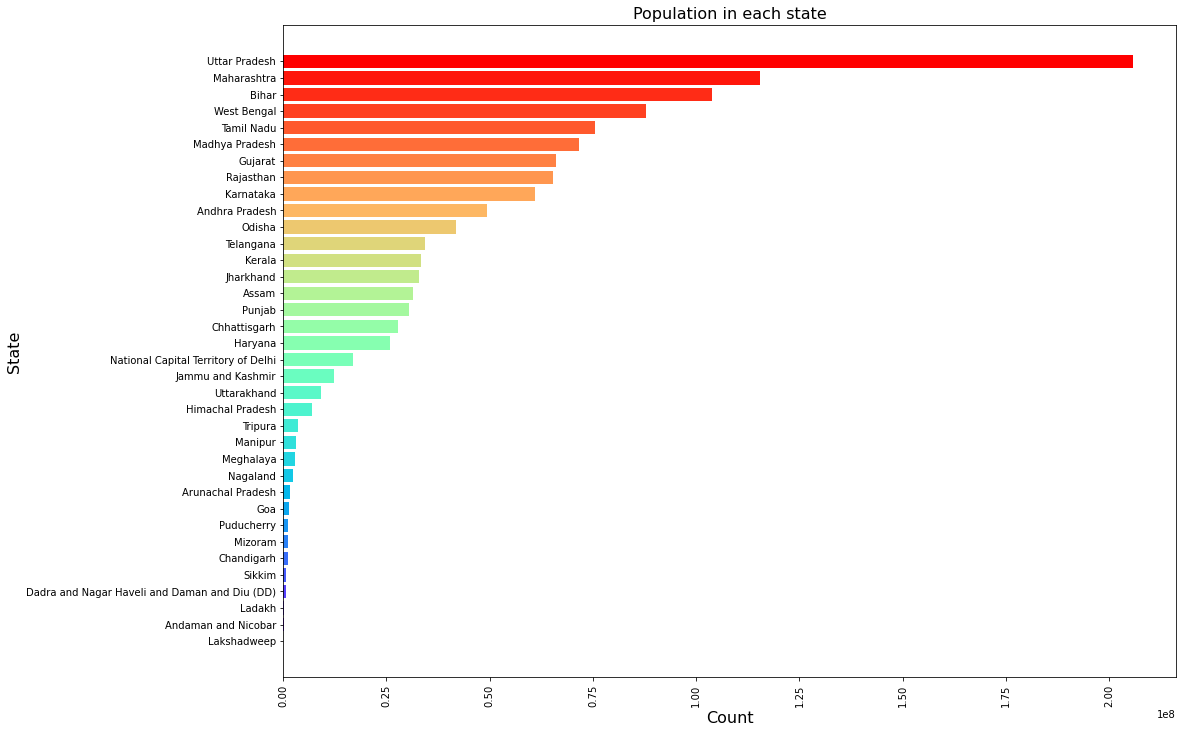

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
df_state.sort_values('Population',inplace=True)
population = df_state['Population']
state = df_state['State']


colors = cm.rainbow(np.linspace(0, 1, len(population.index)))
plt.figure(figsize = (16, 12))
plt.xticks(rotation = 90)
plt.xlabel("Count", fontsize = 16)
plt.ylabel("State", fontsize = 16)
plt.title("Population in each state", fontsize = 16)
plt.barh(state, population.values, color = colors)

In [12]:
print('The data has {} states'.format(len(df['State'].unique())))

The data has 36 states


In [13]:
print('The states are - ' + str(list(df['State'].unique())))

The states are - ['Andaman and Nicobar', 'Andhra Pradesh', 'Karnataka', 'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal', 'Chandigarh', 'Dadra and Nagar Haveli and Daman and Diu (DD)', 'Jammu and Kashmir', 'Ladakh', 'Lakshadweep', 'National Capital Territory of Delhi', 'Puducherry', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jharkhand', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu']


In [14]:
state = input('Enter a State - ')

Enter a State -  Telangana


In [15]:
geolocator = Nominatim(user_agent="tourist_explorist")
location = geolocator.geocode(state)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of ' + state + ' are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Telangana are 17.8495919, 79.1151663.


In [16]:
#dataframe containing only the state which is input by the user
df_user_state = df[df['State']==state].reset_index(drop=True)
df_user_state.head()

,State,Code,District,Headquarters,Population,Area,Density,Latitude,Longitude
0,Telangana,AD,Adilabad,Adilabad,708952,4185.97,171.0,19.6641,78.532
1,Telangana,KB,Komaram Bheem,Asifabad,515835,4300.16,106.0,19.3619,79.293
2,Telangana,BK,Bhadradri Kothagudem,Kothagudem,1304811,8951.00,143.0,17.556,80.617
3,Telangana,HY,Hyderabad,Hyderabad,3441992,4325.29,18172.0,17.385,78.4867
4,Telangana,JL,Jagtial,Jagtial,983414,3043.23,407.0,18.7895,78.912


In [17]:
#map of State using latitude and longitude values
map_state = folium.Map(location=[latitude, longitude], zoom_start=7)


# add markers to map
for lat, lng, st, district in zip(df_user_state['Latitude'], df_user_state['Longitude'], df_user_state['State'], df_user_state['District']):
    label = '{}, {}'.format(district, st)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_state)  
    
map_state

## Foursquare API

#### Define Foursquare Credentials and Version

In [18]:
# The code was removed by Watson Studio for sharing.

Your credentails:
CLIENT_ID: 51GVXTXAJ1Q0LGID3XMMME4W0A5PKX0PUA442AE05XNFWSGQ
CLIENT_SECRET:Z2QM4QTV3TWOYBZBUXM5FSSYY4AZO20HWFHFBF3FVAFSEM3F


In [19]:
url = 'https://api.foursquare.com/v2/venues/categories?&client_id={}&client_secret={}&v={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION)

category_results = requests.get(url).json()
category_results

{'meta': {'code': 200, 'requestId': '5fc5e2fed268be1669bc0234'},
 'response': {'categories': [{'id': '4d4b7104d754a06370d81259',
    'name': 'Arts & Entertainment',
    'pluralName': 'Arts & Entertainment',
    'shortName': 'Arts & Entertainment',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/default_',
     'suffix': '.png'},
    'categories': [{'id': '56aa371be4b08b9a8d5734db',
      'name': 'Amphitheater',
      'pluralName': 'Amphitheaters',
      'shortName': 'Amphitheater',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/default_',
       'suffix': '.png'},
      'categories': []},
     {'id': '4fceea171983d5d06c3e9823',
      'name': 'Aquarium',
      'pluralName': 'Aquariums',
      'shortName': 'Aquarium',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/aquarium_',
       'suffix': '.png'},
      'categories': []},
     {'id': '4bf58dd8d48988d1e1931735',
      'name': 'A

In [20]:
#Lets check number of main categories and sub-categories present in Foursquare API

categories = len(category_results['response']['categories'])

for i in range(categories):
    venues = category_results['response']['categories'][i]['name']
    print(venues)
    for j in range(len(category_results['response']['categories'][i]['categories'])):
        sub_venues = category_results['response']['categories'][i]['categories'][j]['name']
        print('\t\t' + sub_venues)

Arts & Entertainment
		Amphitheater
		Aquarium
		Arcade
		Art Gallery
		Bowling Alley
		Casino
		Circus
		Comedy Club
		Concert Hall
		Country Dance Club
		Disc Golf
		Escape Room
		Exhibit
		General Entertainment
		Go Kart Track
		Historic Site
		Karaoke Box
		Laser Tag
		Memorial Site
		Mini Golf
		Movie Theater
		Museum
		Music Venue
		Pachinko Parlor
		Performing Arts Venue
		Pool Hall
		Public Art
		Racecourse
		Racetrack
		Roller Rink
		Salsa Club
		Samba School
		Stadium
		Theme Park
		Tour Provider
		VR Cafe
		Water Park
		Zoo
College & University
		College Academic Building
		College Administrative Building
		College Auditorium
		College Bookstore
		College Cafeteria
		College Classroom
		College Gym
		College Lab
		College Library
		College Quad
		College Rec Center
		College Residence Hall
		College Stadium
		College Theater
		Community College
		Fraternity House
		General College & University
		Law School
		Medical School
		Sorority House
		Student Center
		Trade School
		U

In [21]:
all_categories = {}

for i in range(categories):
    venues = category_results['response']['categories'][i]['name']
    all_categories[venues] = i

print(all_categories)

{'Arts & Entertainment': 0, 'College & University': 1, 'Event': 2, 'Food': 3, 'Nightlife Spot': 4, 'Outdoors & Recreation': 5, 'Professional & Other Places': 6, 'Residence': 7, 'Shop & Service': 8, 'Travel & Transport': 9}


## Get the required Categories

In [22]:
tourist_category = []
business_category = []
req_categories = ['Arts & Entertainment', 'Nightlife Spot', 'Outdoors & Recreation']
req_categories2 = ['Food', 'Shop & Service', 'Travel & Transport']


for i in req_categories:
    key = all_categories.get(i)
    venues = category_results['response']['categories'][key]['name']
    tourist_category.append(venues)
    for j in range(len(category_results['response']['categories'][key]['categories'])):
        sub_venues = category_results['response']['categories'][key]['categories'][j]['name']
        tourist_category.append(sub_venues)

for i in req_categories2:
    key = all_categories.get(i)
    venues = category_results['response']['categories'][key]['name']
    business_category.append(venues)
    for j in range(len(category_results['response']['categories'][key]['categories'])):
        sub_venues = category_results['response']['categories'][key]['categories'][j]['name']
        business_category.append(sub_venues)

In [23]:
#remove unwanted categories from tourist list
tourist_category.remove('Lounge')
tourist_category.remove('Movie Theater')
tourist_category.remove('Bar')

#remove unwanted categories from business list
business_category.remove('Bus Station')
business_category.remove('ATM')
business_category.remove('Train Station')
business_category.remove('Bus Stop')
business_category.remove('Light Rail Station')
business_category.remove('Toll Booth')
business_category.remove('Toll Plaza')
business_category.remove('Tram Station')

## Get nearby venues of all the districts in Telangana State

In [24]:
LIMIT = 25

def getNearbyVenues_tourist(names, latitudes, longitudes, radius=50000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'District Latitude', 
                  'District Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    nearby_venues = nearby_venues[nearby_venues['Venue Category'].isin(tourist_category)]
    
    return(nearby_venues)

In [25]:
state_venues = getNearbyVenues_tourist(names=df_user_state['District'],
                                   latitudes=df_user_state['Latitude'],
                                   longitudes=df_user_state['Longitude']
                                  )

Adilabad
Komaram Bheem
Bhadradri Kothagudem
Hyderabad
Jagtial
Jangaon
Jayashankar Bhupalpally
Jogulamba Gadwal
Kamareddy
Karimnagar
Khammam
Mahabubabad
Mahbubnagar
Mancherial
Medak
Medchal Malkajgiri
Mulugu
Narayanpet
Nagarkurnool
Nirmal
Nizamabad
Peddapalli
Rajanna Sircilla
Ranga Reddy
Sangareddy
Siddipet
Suryapet
Vikarabad
Wanaparthy
Warangal Urban
Warangal Rural
Yadadri Bhuvanagiri


In [26]:
print(state_venues.shape)
state_venues

(21, 7)


,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
31,Hyderabad,17.3850,78.4867,Necklace Road,17.419384,78.465307,Scenic Lookout
33,Hyderabad,17.3850,78.4867,Lamakaan,17.421017,78.447474,Performing Arts Venue
62,Jayashankar Bhupalpally,18.4293,79.8635,Laknavaram Lake,18.163511,80.076500,Lake
63,Jayashankar Bhupalpally,18.4293,79.8635,laknavaram lake,18.159543,80.080777,Lake
68,Jogulamba Gadwal,16.2337,77.8081,beechpalli,16.161265,77.929067,River
80,Kamareddy,18.3205,78.3370,Medak Church,18.052768,78.266855,Historic Site
112,Medak,18.0529,78.2619,Medak Church,18.052768,78.266855,Historic Site
127,Medchal Malkajgiri,17.4139,78.5856,Necklace Road,17.419384,78.465307,Scenic Lookout
132,Medchal Malkajgiri,17.4139,78.5856,Lamakaan,17.421017,78.447474,Performing Arts Venue
153,Mulugu,18.1932,79.9414,Thousand Pillar Temple,18.004263,79.574852,Historic Site


In [27]:
all_venues = state_venues['Venue'].tolist()
len(all_venues)

21

In [28]:
no_venues_in_district = state_venues.groupby('District', as_index=False).count()
no_venues_in_district = no_venues_in_district[['District','Venue']]
no_venues_in_district.rename(columns={'Venue':'No of Venues'}, inplace=True)
no_venues_in_district

,District,No of Venues
0,Hyderabad,2
1,Jayashankar Bhupalpally,2
2,Jogulamba Gadwal,1
3,Kamareddy,1
4,Medak,1
5,Medchal Malkajgiri,2
6,Mulugu,1
7,Ranga Reddy,1
8,Sangareddy,3
9,Vikarabad,1


In [29]:
max_no_of_venues = no_venues_in_district['No of Venues'].max()
max_no_of_venues

3

<BarContainer object of 14 artists>

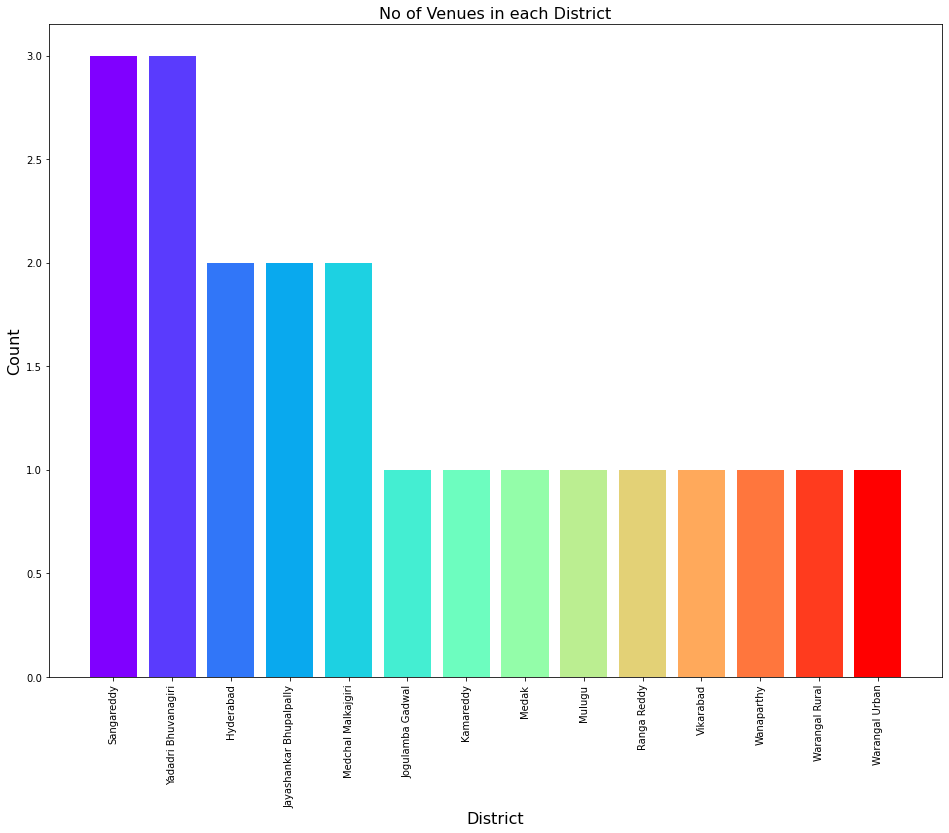

In [30]:
no_venues_in_district.sort_values('No of Venues', ascending=False, inplace=True)
venues = no_venues_in_district['No of Venues']
district = no_venues_in_district['District']


colors = cm.rainbow(np.linspace(0, 1, len(venues.index)))
plt.figure(figsize = (16, 12))
plt.xticks(rotation = 90)
plt.xlabel("District", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("No of Venues in each District", fontsize = 16)
plt.bar(district, venues.values, color = colors)

In [31]:
print('There are {} uniques categories.'.format(len(state_venues['Venue Category'].unique())))

There are 8 uniques categories.


In [32]:
#print unique venue categories
state_venues['Venue Category'].unique()

array(['Scenic Lookout', 'Performing Arts Venue', 'Lake', 'River',
       'Historic Site', 'Nightclub', 'Outdoors & Recreation',
       'General Entertainment'], dtype=object)

## Analyze each District

In [33]:
# one hot encoding
state_venues_onehot = pd.get_dummies(state_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
state_venues_onehot['District'] = state_venues['District'] 

# move neighborhood column to the first column
fixed_columns = [state_venues_onehot.columns[-1]] + list(state_venues_onehot.columns[:-1])
state_venues_onehot = state_venues_onehot[fixed_columns]

state_venues_onehot.head()

,District,General Entertainment,Historic Site,Lake,Nightclub,Outdoors & Recreation,Performing Arts Venue,River,Scenic Lookout
31,Hyderabad,0,0,0,0,0,0,0,1
33,Hyderabad,0,0,0,0,0,1,0,0
62,Jayashankar Bhupalpally,0,0,1,0,0,0,0,0
63,Jayashankar Bhupalpally,0,0,1,0,0,0,0,0
68,Jogulamba Gadwal,0,0,0,0,0,0,1,0


In [34]:
state_venues_onehot.shape

(21, 9)

In [35]:
state_venues_grouped = state_venues_onehot.groupby('District').mean().reset_index()
state_venues_grouped

,District,General Entertainment,Historic Site,Lake,Nightclub,Outdoors & Recreation,Performing Arts Venue,River,Scenic Lookout
0,Hyderabad,0.000000,0.0,0.0,0.000000,0.000000,0.500000,0.0,0.500000
1,Jayashankar Bhupalpally,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000
2,Jogulamba Gadwal,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1.0,0.000000
3,Kamareddy,0.000000,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
4,Medak,0.000000,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
5,Medchal Malkajgiri,0.000000,0.0,0.0,0.000000,0.000000,0.500000,0.0,0.500000
6,Mulugu,0.000000,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
7,Ranga Reddy,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,1.000000
8,Sangareddy,0.000000,0.0,0.0,0.333333,0.333333,0.333333,0.0,0.000000
9,Vikarabad,0.000000,0.0,0.0,0.000000,1.000000,0.000000,0.0,0.000000


In [36]:
state_venues_grouped.shape

(14, 9)

In [37]:
num_top_venues = max_no_of_venues

for hood in state_venues_grouped['District']:
    print("----"+hood+"----")
    temp = state_venues_grouped[state_venues_grouped['District'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Hyderabad----
                   venue  freq
0  Performing Arts Venue   0.5
1         Scenic Lookout   0.5
2  General Entertainment   0.0


----Jayashankar Bhupalpally----
                   venue  freq
0                   Lake   1.0
1  General Entertainment   0.0
2          Historic Site   0.0


----Jogulamba Gadwal----
                   venue  freq
0                  River   1.0
1  General Entertainment   0.0
2          Historic Site   0.0


----Kamareddy----
                   venue  freq
0          Historic Site   1.0
1  General Entertainment   0.0
2                   Lake   0.0


----Medak----
                   venue  freq
0          Historic Site   1.0
1  General Entertainment   0.0
2                   Lake   0.0


----Medchal Malkajgiri----
                   venue  freq
0  Performing Arts Venue   0.5
1         Scenic Lookout   0.5
2  General Entertainment   0.0


----Mulugu----
                   venue  freq
0          Historic Site   1.0
1  General Entertainment   0.0
2 

## Put this into a pandas dataframe

In [38]:
#function to sort the venues in descending order

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [39]:
#create the new dataframe and display the top 10 venues for each district

num_top_venues = max_no_of_venues

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue Category'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue Category'.format(ind+1))

# create a new dataframe
district_venues_sorted = pd.DataFrame(columns=columns)
district_venues_sorted['District'] = state_venues_grouped['District']

for ind in np.arange(state_venues_grouped.shape[0]):
    district_venues_sorted.iloc[ind, 1:] = return_most_common_venues(state_venues_grouped.iloc[ind, :], num_top_venues)

district_venues_sorted.head()

,District,1st Most Common Venue Category,2nd Most Common Venue Category,3rd Most Common Venue Category
0,Hyderabad,Scenic Lookout,Performing Arts Venue,River
1,Jayashankar Bhupalpally,Lake,Scenic Lookout,River
2,Jogulamba Gadwal,River,Scenic Lookout,Performing Arts Venue
3,Kamareddy,Historic Site,Scenic Lookout,River
4,Medak,Historic Site,Scenic Lookout,River


In [40]:
venue_venue_category = state_venues.groupby(['District', 'Venue Category'], as_index=False).agg(lambda x: ", ".join(x))
venue_venue_category.head()

,District,Venue Category,Venue
0,Hyderabad,Performing Arts Venue,Lamakaan
1,Hyderabad,Scenic Lookout,Necklace Road
2,Jayashankar Bhupalpally,Lake,"Laknavaram Lake, laknavaram lake"
3,Jogulamba Gadwal,River,beechpalli
4,Kamareddy,Historic Site,Medak Church


In [41]:
r, c = district_venues_sorted.shape

for rows in range(r):
    a = district_venues_sorted.iloc[rows, 0]
    for col, col_name in enumerate(district_venues_sorted.columns[1:]):
        b = district_venues_sorted.iloc[rows, col+1]
        pf = venue_venue_category[venue_venue_category['District'].str.contains(a) & venue_venue_category['Venue Category'].str.contains(b)]
        if not pf.empty:
            #print(b)
            idx = pf['Venue'].index.values.astype(int)[0]
            ven = pf['Venue'][idx]
            district_venues_sorted.iloc[rows, district_venues_sorted.columns.get_loc(col_name)] = ven
        elif pf.empty:
            district_venues_sorted.iloc[rows, district_venues_sorted.columns.get_loc(col_name)] = ''

## Most common venues according to venue category in each District

In [42]:
indicators = ['st', 'nd', 'rd']
new = []

for ind in np.arange(max_no_of_venues):
    try:
        new.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        new.append('{}th Most Common Venue'.format(ind+1))

district_venues_sorted.columns = district_venues_sorted.columns[:1].tolist() + new

In [43]:
district_venues_sorted

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,Hyderabad,Necklace Road,Lamakaan,
1,Jayashankar Bhupalpally,"Laknavaram Lake, laknavaram lake",,
2,Jogulamba Gadwal,beechpalli,,
3,Kamareddy,Medak Church,,
4,Medak,Medak Church,,
5,Medchal Malkajgiri,Necklace Road,Lamakaan,
6,Mulugu,Thousand Pillar Temple,,
7,Ranga Reddy,Palm Exotica Resort & Spa,,
8,Sangareddy,Lamakaan,Bhel Township,Heart Cup Coffee
9,Vikarabad,Bhel Township,,


## Get Nearby Businesses

In [44]:
LIMIT = 25

def getNearbyBusiness(names, latitudes, longitudes, radius=500):
    
    business_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby business
        business_list.append([(name,
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_business = pd.DataFrame([item for business_list in business_list for item in business_list])
    nearby_business.columns = ['Venue',
                    'Business', 
                  'BLatitude', 
                  'BLongitude', 
                  'Business Category']
    
    nearby_business = nearby_business[nearby_business['Business Category'].isin(business_category)]
    
    return(nearby_business)

In [45]:
nearby_business = getNearbyBusiness(names=state_venues['Venue'],
                                   latitudes=state_venues['Venue Latitude'],
                                   longitudes=state_venues['Venue Longitude']
                                  )

Necklace Road
Lamakaan
Laknavaram Lake
laknavaram lake
beechpalli
Medak Church
Medak Church
Necklace Road
Lamakaan
Thousand Pillar Temple
Palm Exotica Resort & Spa
Heart Cup Coffee
Bhel Township
Lamakaan
Bhel Township
beechpalli
Thousand Pillar Temple
Thousand Pillar Temple
Ramoji Film City
Necklace Road
Lamakaan


In [46]:
print(nearby_business.shape)
nearby_business

(119, 5)


,Venue,Business,BLatitude,BLongitude,Business Category
1,Necklace Road,Waterfront,17.421636,78.465374,Restaurant
2,Necklace Road,Eat Street,17.422086,78.465357,Food Court
3,Necklace Road,Subway,17.422160,78.465373,Sandwich Place
4,Necklace Road,KFC,17.422668,78.462377,Fast Food Restaurant
5,Necklace Road,Pizza Hut,17.422714,78.462230,Pizza Place
6,Necklace Road,Domino's Pizza,17.417110,78.461700,Pizza Place
7,Necklace Road,cafe coffee day,17.422145,78.465362,Café
9,Necklace Road,The Watet Front,17.421810,78.465468,Indian Restaurant
10,Necklace Road,By The Bay,17.421958,78.465255,Restaurant
12,Lamakaan,GVK One,17.419411,78.448069,Shopping Mall


In [47]:
no_nearby_business = nearby_business.groupby('Business Category', as_index=False).count()
no_nearby_business = no_nearby_business[['Business Category','Business']]
no_nearby_business.rename(columns={'Business':'No of Businesses'}, inplace=True)
no_nearby_business

,Business Category,No of Businesses
0,American Restaurant,4
1,Asian Restaurant,4
2,BBQ Joint,6
3,Bookstore,4
4,Café,5
5,Clothing Store,4
6,Coffee Shop,8
7,Department Store,4
8,Fast Food Restaurant,11
9,Food Court,8


In [48]:
print('There are {} uniques categories.'.format(len(nearby_business['Business Category'].unique())))

There are 19 uniques categories.


## Perform one-hot encoding on retrieved business categories

In [49]:
# one hot encoding
nearby_business_onehot = pd.get_dummies(nearby_business[['Business Category']], prefix="", prefix_sep="")

# add venue column back to dataframe
nearby_business_onehot['Venue'] = nearby_business['Venue'] 

# move venue column to the first column
fixed_columns = [nearby_business_onehot.columns[-1]] + list(nearby_business_onehot.columns[:-1])
nearby_business_onehot = nearby_business_onehot[fixed_columns]

nearby_business_onehot.head()

,Venue,American Restaurant,Asian Restaurant,BBQ Joint,Bookstore,Café,Clothing Store,Coffee Shop,Department Store,Fast Food Restaurant,Food Court,Food Truck,Furniture / Home Store,Hotel,Indian Restaurant,Pizza Place,Restaurant,Sandwich Place,Shopping Mall,Turkish Restaurant
1,Necklace Road,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,Necklace Road,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,Necklace Road,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,Necklace Road,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
5,Necklace Road,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [50]:
nearby_business_onehot.shape

(119, 20)

In [51]:
nearby_business_grouped = nearby_business_onehot.groupby('Venue').mean().reset_index()
nearby_business_grouped

,Venue,American Restaurant,Asian Restaurant,BBQ Joint,Bookstore,Café,Clothing Store,Coffee Shop,Department Store,Fast Food Restaurant,Food Court,Food Truck,Furniture / Home Store,Hotel,Indian Restaurant,Pizza Place,Restaurant,Sandwich Place,Shopping Mall,Turkish Restaurant
0,Bhel Township,0.0000,0.0000,0.000000,0.0000,0.000000,0.0000,0.000,0.000000,0.000000,0.000000,0.0,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0000,1.0
1,Heart Cup Coffee,0.0000,0.0000,0.117647,0.0000,0.117647,0.0000,0.000,0.058824,0.000000,0.058824,0.0,0.0000,0.0000,0.529412,0.000000,0.058824,0.058824,0.0000,0.0
2,Lamakaan,0.0625,0.0625,0.062500,0.0625,0.000000,0.0625,0.125,0.000000,0.125000,0.062500,0.0,0.0625,0.0625,0.062500,0.062500,0.000000,0.062500,0.0625,0.0
3,Medak Church,0.0000,0.0000,0.000000,0.0000,0.000000,0.0000,0.000,0.000000,0.000000,0.000000,0.0,0.0000,0.0000,1.000000,0.000000,0.000000,0.000000,0.0000,0.0
4,Necklace Road,0.0000,0.0000,0.000000,0.0000,0.111111,0.0000,0.000,0.000000,0.111111,0.111111,0.0,0.0000,0.0000,0.111111,0.222222,0.222222,0.111111,0.0000,0.0
5,Ramoji Film City,0.0000,0.0000,0.000000,0.0000,0.000000,0.0000,0.000,0.000000,0.000000,0.000000,1.0,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0
6,Thousand Pillar Temple,0.0000,0.0000,0.000000,0.0000,0.000000,0.0000,0.000,0.500000,0.000000,0.000000,0.0,0.0000,0.0000,0.500000,0.000000,0.000000,0.000000,0.0000,0.0


In [52]:
nearby_business_grouped.shape

(7, 20)

In [53]:
num_top_business = 5

for hood in nearby_business_grouped['Venue']:
    print("----"+hood+"----")
    temp = nearby_business_grouped[nearby_business_grouped['Venue'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_business))
    print('\n')

----Bhel Township----
                venue  freq
0  Turkish Restaurant   1.0
1          Food Truck   0.0
2       Shopping Mall   0.0
3      Sandwich Place   0.0
4          Restaurant   0.0


----Heart Cup Coffee----
               venue  freq
0  Indian Restaurant  0.53
1          BBQ Joint  0.12
2               Café  0.12
3         Food Court  0.06
4     Sandwich Place  0.06


----Lamakaan----
                    venue  freq
0             Coffee Shop  0.12
1    Fast Food Restaurant  0.12
2     American Restaurant  0.06
3  Furniture / Home Store  0.06
4           Shopping Mall  0.06


----Medak Church----
                 venue  freq
0    Indian Restaurant   1.0
1  American Restaurant   0.0
2           Food Truck   0.0
3        Shopping Mall   0.0
4       Sandwich Place   0.0


----Necklace Road----
            venue  freq
0      Restaurant  0.22
1     Pizza Place  0.22
2      Food Court  0.11
3  Sandwich Place  0.11
4            Café  0.11


----Ramoji Film City----
                 v

## Put this into a pandas dataframe   (num_top_business = 10)

In [54]:
#function to sort the business in descending order

def return_most_common_business(row, num_top_business):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_business]

In [55]:
num_top_business = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top business
columns = ['Venue']
for ind in np.arange(num_top_business):
    try:
        columns.append('{}{} Most Common Business'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Business'.format(ind+1))

# create a new dataframe
nearby_business_sorted = pd.DataFrame(columns=columns)
nearby_business_sorted['Venue'] = nearby_business_grouped['Venue']

for ind in np.arange(nearby_business_grouped.shape[0]):
    nearby_business_sorted.iloc[ind, 1:] = return_most_common_business(nearby_business_grouped.iloc[ind, :], num_top_business)

nearby_business_sorted.head()

,Venue,1st Most Common Business,2nd Most Common Business,3rd Most Common Business,4th Most Common Business,5th Most Common Business,6th Most Common Business,7th Most Common Business,8th Most Common Business,9th Most Common Business,10th Most Common Business
0,Bhel Township,Turkish Restaurant,Fast Food Restaurant,Asian Restaurant,BBQ Joint,Bookstore,Café,Clothing Store,Coffee Shop,Department Store,Food Court
1,Heart Cup Coffee,Indian Restaurant,BBQ Joint,Café,Food Court,Department Store,Sandwich Place,Restaurant,Asian Restaurant,Bookstore,Clothing Store
2,Lamakaan,Coffee Shop,Fast Food Restaurant,Food Court,Shopping Mall,Asian Restaurant,BBQ Joint,Bookstore,Clothing Store,American Restaurant,Furniture / Home Store
3,Medak Church,Indian Restaurant,Turkish Restaurant,Fast Food Restaurant,Asian Restaurant,BBQ Joint,Bookstore,Café,Clothing Store,Coffee Shop,Department Store
4,Necklace Road,Restaurant,Pizza Place,Food Court,Sandwich Place,Indian Restaurant,Café,Fast Food Restaurant,Coffee Shop,Asian Restaurant,BBQ Joint


## Perform Clustering

### Find the optimal k value for clustering

In [56]:
from matplotlib.colors import rgb2hex

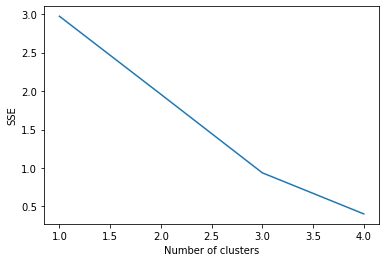

In [57]:
sse = {}
for k in range(1,5):
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(nearby_business_grouped.drop('Venue',axis=1))
    nearby_business_grouped['Cluster'] = kmeans.labels_
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

### Use the optimal k value obtained from the above graph

In [58]:
#Run k-means to cluster the neighborhood into 2 clusters

# set number of clusters
kclusters = 3

nearby_business_grouped_clustering = nearby_business_grouped.drop('Venue', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(nearby_business_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 1, 0, 1, 0, 0, 1], dtype=int32)

In [59]:

#create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood

# add clustering labels
nearby_business_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

nearby_business_merged = nearby_business[['Venue']]
new_state_venues = state_venues[['Venue', 'Venue Latitude', 'Venue Longitude']]

nearby_business_merged = nearby_business_merged.join(new_state_venues.set_index('Venue'), on='Venue')

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
nearby_business_merged = nearby_business_merged.join(nearby_business_sorted.set_index('Venue'), on='Venue')

nearby_business_merged.drop_duplicates(subset='Venue', keep='first', inplace=True)
nearby_business_merged

,Venue,Venue Latitude,Venue Longitude,Cluster Labels,1st Most Common Business,2nd Most Common Business,3rd Most Common Business,4th Most Common Business,5th Most Common Business,6th Most Common Business,7th Most Common Business,8th Most Common Business,9th Most Common Business,10th Most Common Business
1,Necklace Road,17.419384,78.465307,0,Restaurant,Pizza Place,Food Court,Sandwich Place,Indian Restaurant,Café,Fast Food Restaurant,Coffee Shop,Asian Restaurant,BBQ Joint
12,Lamakaan,17.421017,78.447474,0,Coffee Shop,Fast Food Restaurant,Food Court,Shopping Mall,Asian Restaurant,BBQ Joint,Bookstore,Clothing Store,American Restaurant,Furniture / Home Store
34,Medak Church,18.052768,78.266855,1,Indian Restaurant,Turkish Restaurant,Fast Food Restaurant,Asian Restaurant,BBQ Joint,Bookstore,Café,Clothing Store,Coffee Shop,Department Store
71,Thousand Pillar Temple,18.004263,79.574852,1,Indian Restaurant,Department Store,Turkish Restaurant,Fast Food Restaurant,Asian Restaurant,BBQ Joint,Bookstore,Café,Clothing Store,Coffee Shop
77,Heart Cup Coffee,17.459794,78.368608,1,Indian Restaurant,BBQ Joint,Café,Food Court,Department Store,Sandwich Place,Restaurant,Asian Restaurant,Bookstore,Clothing Store
97,Bhel Township,17.495007,78.303459,2,Turkish Restaurant,Fast Food Restaurant,Asian Restaurant,BBQ Joint,Bookstore,Café,Clothing Store,Coffee Shop,Department Store,Food Court
133,Ramoji Film City,17.309839,78.681879,0,Food Truck,Turkish Restaurant,Fast Food Restaurant,Asian Restaurant,BBQ Joint,Bookstore,Café,Clothing Store,Coffee Shop,Department Store


## Visualize Clusters

In [60]:
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib.colors import rgb2hex
from sklearn.cluster import KMeans
import folium
import math
#import warnings
#warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [61]:
#visualize the resulting clusters

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=7)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(nearby_business_merged['Venue Latitude'], nearby_business_merged['Venue Longitude'], nearby_business_merged['Venue'], nearby_business_merged['Cluster Labels']):
    if not math.isnan(cluster):
        label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
        folium.CircleMarker(
            [lat, lon],
            radius=5,
            popup=label,
            color=rainbow[int(cluster)],
            fill=True,
            fill_color=rainbow[int(cluster)],
            fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examine Clusters
### Examine each cluster and determine the businesses that distinguish each cluster.

#### Cluster 1

In [62]:
nearby_business_merged.loc[nearby_business_merged['Cluster Labels'] == 0, nearby_business_merged.columns[[0] + list(range(4, nearby_business_merged.shape[1]))]]

,Venue,1st Most Common Business,2nd Most Common Business,3rd Most Common Business,4th Most Common Business,5th Most Common Business,6th Most Common Business,7th Most Common Business,8th Most Common Business,9th Most Common Business,10th Most Common Business
1,Necklace Road,Restaurant,Pizza Place,Food Court,Sandwich Place,Indian Restaurant,Café,Fast Food Restaurant,Coffee Shop,Asian Restaurant,BBQ Joint
12,Lamakaan,Coffee Shop,Fast Food Restaurant,Food Court,Shopping Mall,Asian Restaurant,BBQ Joint,Bookstore,Clothing Store,American Restaurant,Furniture / Home Store
133,Ramoji Film City,Food Truck,Turkish Restaurant,Fast Food Restaurant,Asian Restaurant,BBQ Joint,Bookstore,Café,Clothing Store,Coffee Shop,Department Store


#### Cluster 2

In [63]:
nearby_business_merged.loc[nearby_business_merged['Cluster Labels'] == 1, nearby_business_merged.columns[[0] + list(range(4, nearby_business_merged.shape[1]))]]

,Venue,1st Most Common Business,2nd Most Common Business,3rd Most Common Business,4th Most Common Business,5th Most Common Business,6th Most Common Business,7th Most Common Business,8th Most Common Business,9th Most Common Business,10th Most Common Business
34,Medak Church,Indian Restaurant,Turkish Restaurant,Fast Food Restaurant,Asian Restaurant,BBQ Joint,Bookstore,Café,Clothing Store,Coffee Shop,Department Store
71,Thousand Pillar Temple,Indian Restaurant,Department Store,Turkish Restaurant,Fast Food Restaurant,Asian Restaurant,BBQ Joint,Bookstore,Café,Clothing Store,Coffee Shop
77,Heart Cup Coffee,Indian Restaurant,BBQ Joint,Café,Food Court,Department Store,Sandwich Place,Restaurant,Asian Restaurant,Bookstore,Clothing Store


#### Cluster 3

In [64]:
nearby_business_merged.loc[nearby_business_merged['Cluster Labels'] == 2, nearby_business_merged.columns[[0] + list(range(4, nearby_business_merged.shape[1]))]]

,Venue,1st Most Common Business,2nd Most Common Business,3rd Most Common Business,4th Most Common Business,5th Most Common Business,6th Most Common Business,7th Most Common Business,8th Most Common Business,9th Most Common Business,10th Most Common Business
97,Bhel Township,Turkish Restaurant,Fast Food Restaurant,Asian Restaurant,BBQ Joint,Bookstore,Café,Clothing Store,Coffee Shop,Department Store,Food Court
